In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
# files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [102]:
# read the city data and store it as a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [103]:
# read the ride data and store it as a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## inspect the city dataframe


1. Get all the rows that contain null values
2. Make sure the driver_count column has an integer data type.
3. Find out how many data points there are for each type of city.


In [104]:
# get rows and columns that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [105]:
# get rows and columns that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [106]:
# get the data types of each columns
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [107]:
# get the unique city types
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [108]:
# get the number of data points from the Urban cities
sum(city_data_df['type'] == 'Urban')

66

In [109]:
# get the number of data points from the Suburban 
sum(city_data_df['type'] == 'Suburban')

36

In [110]:
# get the number of data points from the Rular cities 
sum(city_data_df['type'] == 'Rural')

18

## inspect the ride dataframe


1. Get all the rows that contain null values.
2. Make sure the fare and ride_id columns are numerical data types.

In [111]:
#get columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [112]:
# get columns and rows that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [113]:
# get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## merge dataframes

* When we merge two DataFrames, we merge on a column with the same data, and the same column name, in both DataFrames. 
    - Use the following syntax to do that:
    `new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])`

In [114]:
# combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## create dataframes for each type of city

In [115]:
pyber_data_df.groupby('type').count()

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [116]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [117]:
urban_cities_df.head()
suburban_cities_df.head()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## get the number of rides for each city type

In [119]:
# get the muber of rides for city in each city type
urban_ride_count = urban_cities_df.groupby('city')['ride_id'].count()
suburban_ride_count = suburban_cities_df.groupby('city')['ride_id'].count()
rural_ride_count = rural_cities_df.groupby('city')['ride_id'].count()

urban_ride_count.head(3)
suburban_ride_count.head(3)
rural_ride_count.head(3)

city
Amandaburgh    18
Barajasview    22
Carriemouth    27
Name: ride_id, dtype: int64

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Name: ride_id, dtype: int64

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Name: ride_id, dtype: int64

## get the avegage fare for each city type

`urban_cities_df.groupby('city')[['fare', 'driver_count']].mean()`

In [120]:
# get the average fare for each city in each city type
urban_avg_fare = urban_cities_df.groupby('city')['fare'].mean()
suburban_avg_fare = suburban_cities_df.groupby('city')['fare'].mean()
rural_avg_fare = rural_cities_df.groupby('city')['fare'].mean()

urban_avg_fare.head(3)
suburban_avg_fare.head(3)
rural_avg_fare.head(3)

city
Amandaburgh    24.641667
Barajasview    25.332273
Carriemouth    28.314444
Name: fare, dtype: float64

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Name: fare, dtype: float64

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Name: fare, dtype: float64

## get the average number of drivers for each city type

In [121]:
# get the average number of drivers for each city in each city type
urban_driver_count = urban_cities_df.groupby('city')['driver_count'].mean()
suburban_driver_count = suburban_cities_df.groupby('city')['driver_count'].mean()
rural_driver_count = rural_cities_df.groupby('city')['driver_count'].mean()

urban_driver_count.head(3)
suburban_driver_count.head(3)
rural_driver_count.head(3)

city
Amandaburgh    12.0
Barajasview    26.0
Carriemouth    52.0
Name: driver_count, dtype: float64

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Name: driver_count, dtype: float64

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Name: driver_count, dtype: float64

## create buble charts

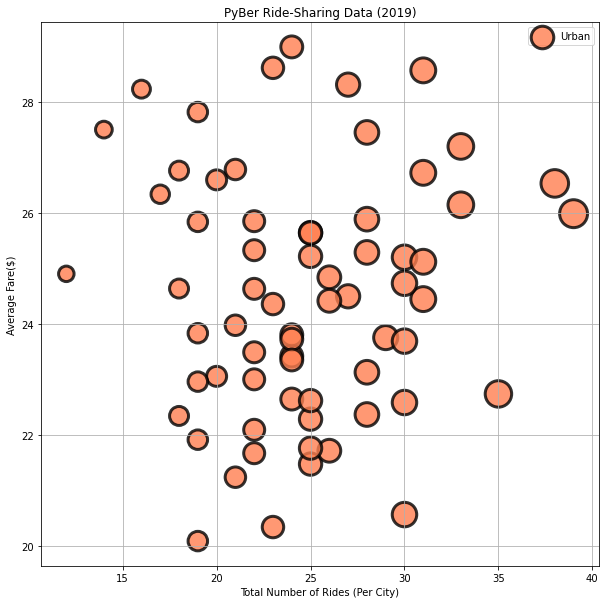

In [132]:
# build the scatter plots for urban cities
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            c='coral', 
            linewidths=3,
            edgecolor='black',
            s=urban_ride_count * 22,
            alpha=0.8,
            label='Urban')

# plt.scatter(suburban_ride_count, 
#             suburban_avg_fare, 
#             color='skyblue', 
#             linewidths=3, 
#             s=suburban_ride_count,
#             label='Suburban')

# plt.scatter(rural_ride_count, 
#             rural_avg_fare, 
#             color='yellow', 
#             linewidths=3, 
#             s=rural_ride_count,
#             label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid()
plt.show();

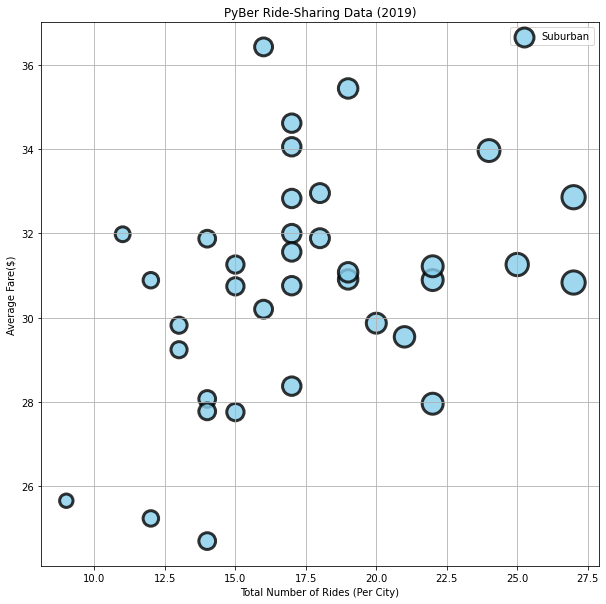

In [133]:
# build the scatter plots for suburban
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            c='skyblue', 
            linewidths=3,
            edgecolor='black',
            s=suburban_ride_count * 22,
            alpha=0.8,
            label='Suburban')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid()
plt.show();

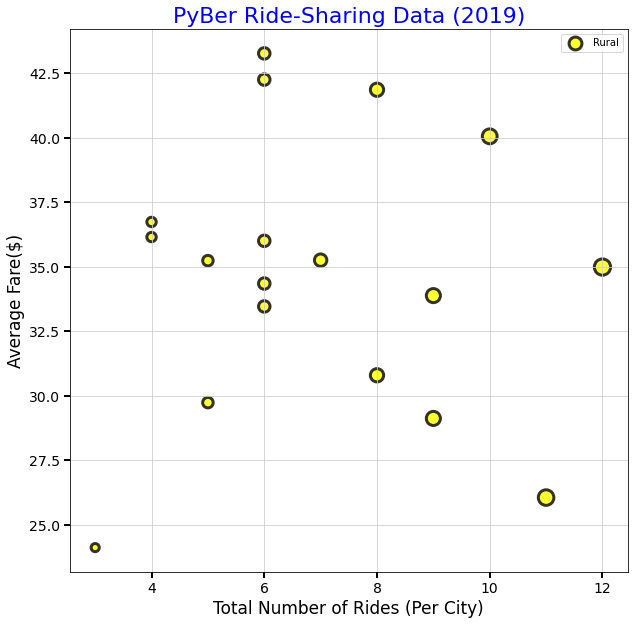

In [165]:
# build the scatter plots for suburban
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            c='yellow', 
            linewidths=3,
            edgecolor='black',
            s=rural_ride_count * 22,
            alpha=0.8,
            label='Rural')

ax.tick_params(
    axis='both',
    direction='out',
    labelrotation=0,
    labelsize=14,
    length=6, 
    width=2, 
    colors='k',
    grid_color='#ccc')

# ax.tick_params(
#     axis='y',
#     direction='out',
#     labelrotation=0,
#     labelsize=14,
#     length=6, 
#     width=2, 
#     colors='k',
#     grid_color='#ccc')
ax.set_title('PyBer Ride-Sharing Data (2019)', fontsize=22, color='blue')
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=17)
ax.set_ylabel('Average Fare($)', fontsize=17)
plt.legend()
plt.grid()
plt.show();

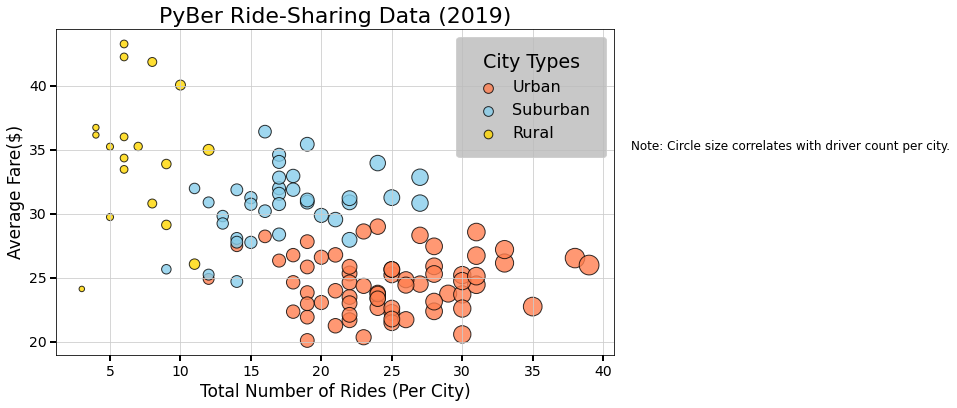

In [202]:
# build the scatter plots for suburban
fig, ax = plt.subplots(figsize=(10, 6))

#urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            c='coral', 
            linewidths=1,
            edgecolor='black',
            s=urban_ride_count * 10,
            alpha=0.8,
            label='Urban')

# suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            c='skyblue', 
            linewidths=1,
            edgecolor='black',
            s=suburban_ride_count * 10,
            alpha=0.8,
            label='Suburban')

# rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            c='gold', 
            linewidths=1,
            edgecolor='black',
            s=rural_ride_count * 10,
            alpha=0.8,
            label='Rural')

# ticks
ax.tick_params(
    axis='both',
    direction='out',
    labelrotation=0,
    labelsize=14,
    length=6, 
    width=2, 
    colors='k',
    grid_color='#ccc')

# axes labels and title
ax.set_title('PyBer Ride-Sharing Data (2019)', fontsize=22, color='k')
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=17)
ax.set_ylabel('Average Fare($)', fontsize=17)
lgnd = plt.legend(
    fontsize=16, 
    markerscale=0.9, 
    borderpad=1.0, 
    handletextpad=0.5,
    facecolor='#bbb',
    mode='expanded',
    loc='best',
    title='City Types')
for i in [0, 1, 2]:
    lgnd.legendHandles[i]._sizes = [95]

lgnd.get_title().set_fontsize(19)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
lgnd.legendHandles[2]._sizes = [75]
plt.grid()
plt.savefig('analysis/fig1.png')
plt.show();